In [1]:
import pandas as pd
import json
from environs import Env
from graph_functions import query_to_df,start_graph_session,start_graph_session_crashdown
from IPython.display import Image


env = Env()
#session = start_graph_session(env) 
session = start_graph_session_crashdown(env) 

14196


In this norebook:
- explore trastusumab as positive control for graph connectivity
- explore taximofen as positive control
 
- weird enterobiasis??

## Basic test1: drugs to disease

In [2]:
query="""
match (drug:Drug)
where toLower(drug.label) contains "trastuzumab"
return drug.label, drug.id
"""
df= query_to_df(session, query)
df


match (drug:Drug)
where toLower(drug.label) contains "trastuzumab"
return drug.label, drug.id



,drug.label,drug.id
0,TRASTUZUMAB EMTANSINE,None
1,TRASTUZUMAB DERUXTECAN,None
2,TRASTUZUMAB,None


In [3]:
# drugs to disease
query="""
match (drug:Drug)-[:OPENTARGETS_DRUG_TO_DISEASE]->(disease:Disease)
where toLower(drug.label) contains "trastuzumab"
return drug.label, drug.id, disease.label
"""
df= query_to_df(session, query)
df


match (drug:Drug)-[:OPENTARGETS_DRUG_TO_DISEASE]->(disease:Disease)
where toLower(drug.label) contains "trastuzumab"
return drug.label, drug.id, disease.label



,drug.label,drug.id,disease.label
0,TRASTUZUMAB EMTANSINE,None,breast carcinoma
1,TRASTUZUMAB EMTANSINE,None,neoplasm (disease)
2,TRASTUZUMAB EMTANSINE,None,breast cancer
3,TRASTUZUMAB DERUXTECAN,None,breast cancer
4,TRASTUZUMAB,None,breast carcinoma


In [4]:
# drug to gene to protein to pathway
query="""
match (drug:Drug)-[:OPENTARGETS_DRUG_TO_TARGET]->(gene:Gene)-[]->(p:Protein)-[]->(path:Pathway)
where toLower(drug.label) contains "trastuzumab"
return drug.label,  gene.name as GeneTarget, 
        collect(distinct p.name) as proteinProducts, collect(path.name) as pathways
order by drug.label
"""
df= query_to_df(session, query)
df


match (drug:Drug)-[:OPENTARGETS_DRUG_TO_TARGET]->(gene:Gene)-[]->(p:Protein)-[]->(path:Pathway)
where toLower(drug.label) contains "trastuzumab"
return drug.label,  gene.name as GeneTarget, 
        collect(distinct p.name) as proteinProducts, collect(path.name) as pathways
order by drug.label



,drug.label,GeneTarget,proteinProducts,pathways
0,TRASTUZUMAB,ERBB2,[P04626],"[Axon guidance, Constitutive Signaling by Aber..."
1,TRASTUZUMAB DERUXTECAN,ERBB2,[P04626],"[Axon guidance, Constitutive Signaling by Aber..."
2,TRASTUZUMAB DERUXTECAN,TOP1,[P11387],"[Metabolism of proteins, Post-translational pr..."
3,TRASTUZUMAB EMTANSINE,TUBB4B,[P68371],"[AURKA Activation by TPX2, Activation of AMPK ..."
4,TRASTUZUMAB EMTANSINE,TUBB,[P07437],"[AURKA Activation by TPX2, Anchoring of the ba..."
5,TRASTUZUMAB EMTANSINE,TUBB4A,[P04350],"[AURKA Activation by TPX2, Activation of AMPK ..."
6,TRASTUZUMAB EMTANSINE,TUBB2A,[Q13885],"[Activation of AMPK downstream of NMDARs, Acti..."
7,TRASTUZUMAB EMTANSINE,TUBB3,[Q13509],"[Activation of AMPK downstream of NMDARs, Acti..."
8,TRASTUZUMAB EMTANSINE,TUBB1,[Q9H4B7],"[Activation of AMPK downstream of NMDARs, Acti..."
9,TRASTUZUMAB EMTANSINE,TUBB2B,[Q9BVA1],"[Activation of AMPK downstream of NMDARs, Acti..."


In [5]:
query="""
match (drug:Drug)-[r1:OPENTARGETS_DRUG_TO_TARGET]->(gene:Gene)-[r2]->(p:Protein)
where toLower(drug.label) contains "trastuzumab"
return drug, gene, p,  r1,r2
"""
# image

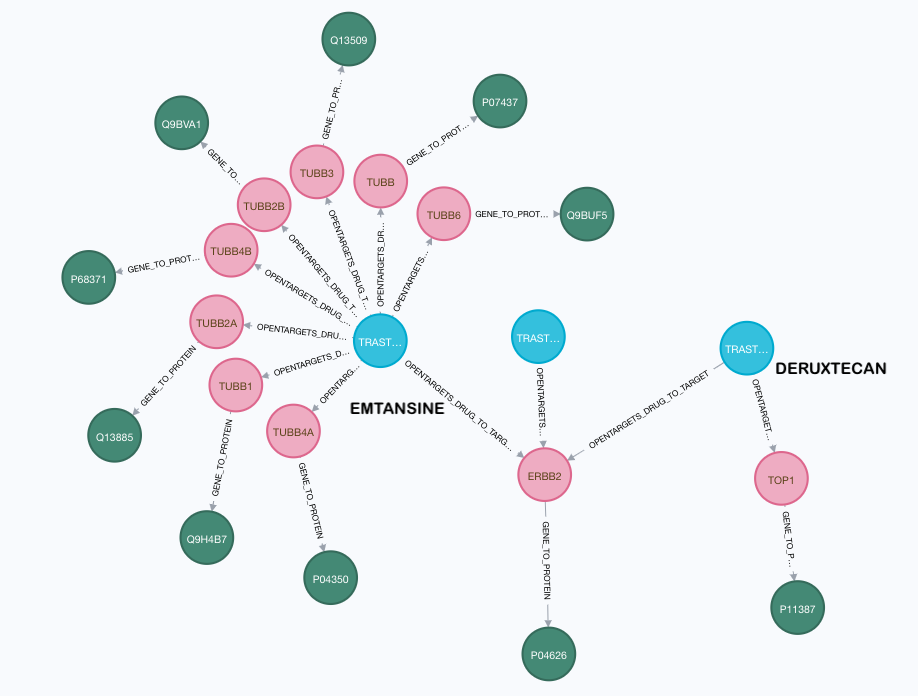

In [6]:
Image(filename = "figures/herceptin_genes.png", width = 800)

In [7]:
# drug to gene (lit term) to other lit term; drug to disease 

query="""
match (drug:Drug)-[r1:OPENTARGETS_DRUG_TO_TARGET]->(gene:Gene)<-[:TERM_TO_GENE]-(l1:LiteratureTerm)-[]-(lt:LiteratureTriple)-[]-(l2:LiteratureTerm)
where toLower(drug.label) contains "trastuzumab"
match (drug)-[r4]->(disease:Disease)
set disease.name = disease.label
return drug.label, gene.name, disease.name, 
        l1.name as term1, lt.predicate as pred1, l2.name as term2 
"""
df_complex= query_to_df(session, query)
df_complex


match (drug:Drug)-[r1:OPENTARGETS_DRUG_TO_TARGET]->(gene:Gene)<-[:TERM_TO_GENE]-(l1:LiteratureTerm)-[]-(lt:LiteratureTriple)-[]-(l2:LiteratureTerm)
where toLower(drug.label) contains "trastuzumab"
match (drug)-[r4]->(disease:Disease)
set disease.name = disease.label
return drug.label, gene.name, disease.name, 
        l1.name as term1, lt.predicate as pred1, l2.name as term2 



,drug.label,gene.name,disease.name,term1,pred1,term2
0,TRASTUZUMAB EMTANSINE,ERBB2,breast carcinoma,ERBB2,INTERACTS_WITH,BRAF
1,TRASTUZUMAB EMTANSINE,ERBB2,neoplasm (disease),ERBB2,INTERACTS_WITH,BRAF
2,TRASTUZUMAB EMTANSINE,ERBB2,breast cancer,ERBB2,INTERACTS_WITH,BRAF
3,TRASTUZUMAB EMTANSINE,ERBB2,breast carcinoma,ERBB2,INTERACTS_WITH,BRAF gene
4,TRASTUZUMAB EMTANSINE,ERBB2,neoplasm (disease),ERBB2,INTERACTS_WITH,BRAF gene
...,...,...,...,...,...,...
33158,TRASTUZUMAB,ERBB2,breast carcinoma,ERBB2,INTERACTS_WITH,AKT1
33159,TRASTUZUMAB,ERBB2,breast carcinoma,ERBB2,INTERACTS_WITH,Proto-Oncogene Proteins c-akt
33160,TRASTUZUMAB,ERBB2,breast carcinoma,ERBB2,INTERACTS_WITH,"Antibodies, Bispecific"
33161,TRASTUZUMAB,ERBB2,breast carcinoma,ERBB2,INTERACTS_WITH,Agent


In [8]:
# need to explore the table above!

## Basic test2: drugs to disease

In [9]:
query="""
match (drug:Drug)
where toLower(drug.label) contains "tamoxifen"
return drug.label, drug.chembl_uri
"""
df= query_to_df(session, query)
df


match (drug:Drug)
where toLower(drug.label) contains "tamoxifen"
return drug.label, drug.chembl_uri



,drug.label,drug.chembl_uri
0,TAMOXIFEN,http://identifiers.org/chembl.compound/CHEMBL83


In [10]:
# drugs to disease
query="""
match (drug:Drug)-[:OPENTARGETS_DRUG_TO_DISEASE]->(disease:Disease)
where drug.chembl_uri =  'http://identifiers.org/chembl.compound/CHEMBL83'
return drug.label, drug.chembl_uri, disease.label
"""
df= query_to_df(session, query)
df


match (drug:Drug)-[:OPENTARGETS_DRUG_TO_DISEASE]->(disease:Disease)
where drug.chembl_uri =  'http://identifiers.org/chembl.compound/CHEMBL83'
return drug.label, drug.chembl_uri, disease.label



,drug.label,drug.chembl_uri,disease.label
0,TAMOXIFEN,http://identifiers.org/chembl.compound/CHEMBL83,breast cancer


In [11]:
# drug to gene to protein to pathway
query="""
match (drug:Drug)-[:OPENTARGETS_DRUG_TO_TARGET]->(gene:Gene)-[]->(p:Protein)-[]->(path:Pathway)
where drug.chembl_uri =  'http://identifiers.org/chembl.compound/CHEMBL83'
return drug.label,  gene.name as GeneTarget, 
        collect(distinct p.name) as proteinProducts, collect(path.name) as pathways
order by drug.label
"""
df= query_to_df(session, query)
df


match (drug:Drug)-[:OPENTARGETS_DRUG_TO_TARGET]->(gene:Gene)-[]->(p:Protein)-[]->(path:Pathway)
where drug.chembl_uri =  'http://identifiers.org/chembl.compound/CHEMBL83'
return drug.label,  gene.name as GeneTarget, 
        collect(distinct p.name) as proteinProducts, collect(path.name) as pathways
order by drug.label



,drug.label,GeneTarget,proteinProducts,pathways
0,TAMOXIFEN,ESR1,[P03372],"[Estrogen-dependent gene expression, Extra-nuc..."


In [16]:

query="""
match(p:Pathway)
where p.name in {}
return p
""".format(df['pathways'][0])
df= query_to_df(session, query)
df


match(p:Pathway)
where p.name in ['Estrogen-dependent gene expression', 'Extra-nuclear estrogen signaling', 'Signaling by Receptor Tyrosine Kinases', 'Signaling by Nuclear Receptors', 'Intracellular signaling by second messengers', 'Regulation of RUNX2 expression and activity', 'RUNX1 regulates transcription of genes involved in WNT signaling', 'ESR-mediated signaling', 'RUNX1 regulates estrogen receptor mediated transcription', 'Transcriptional regulation by RUNX1', 'Transcriptional regulation by RUNX2', 'TFAP2 (AP-2) family regulates transcription of growth factors and their receptors', 'Transcriptional regulation by the AP-2 (TFAP2) family of transcription factors', 'Gene expression (Transcription)', 'RNA Polymerase II Transcription', 'PI5P, PP2A and IER3 Regulate PI3K/AKT Signaling', 'Post-translational protein modification', 'Ovarian tumor domain proteases', 'Deubiquitination', 'Diseases of signal transduction by growth factor receptors and second messengers', 'SUMOylation of int

,p._name,p.name,p._source,p.id,p._id,p.url
0,Constitutive Signaling by Aberrant PI3K in Cancer,Constitutive Signaling by Aberrant PI3K in Cancer,[Reactome-2020-10-13],R-HSA-2219530,R-HSA-2219530,https://reactome.org/PathwayBrowser/#/R-HSA-22...
1,Deubiquitination,Deubiquitination,[Reactome-2020-10-13],R-HSA-5688426,R-HSA-5688426,https://reactome.org/PathwayBrowser/#/R-HSA-56...
2,Disease,Disease,[Reactome-2020-10-13],R-HSA-1643685,R-HSA-1643685,https://reactome.org/PathwayBrowser/#/R-HSA-16...
3,Diseases of signal transduction by growth fact...,Diseases of signal transduction by growth fact...,[Reactome-2020-10-13],R-HSA-5663202,R-HSA-5663202,https://reactome.org/PathwayBrowser/#/R-HSA-56...
4,ESR-mediated signaling,ESR-mediated signaling,[Reactome-2020-10-13],R-HSA-8939211,R-HSA-8939211,https://reactome.org/PathwayBrowser/#/R-HSA-89...
5,Estrogen-dependent gene expression,Estrogen-dependent gene expression,[Reactome-2020-10-13],R-HSA-9018519,R-HSA-9018519,https://reactome.org/PathwayBrowser/#/R-HSA-90...
6,Extra-nuclear estrogen signaling,Extra-nuclear estrogen signaling,[Reactome-2020-10-13],R-HSA-9009391,R-HSA-9009391,https://reactome.org/PathwayBrowser/#/R-HSA-90...
7,Gene expression (Transcription),Gene expression (Transcription),[Reactome-2020-10-13],R-HSA-74160,R-HSA-74160,https://reactome.org/PathwayBrowser/#/R-HSA-74160
8,Generic Transcription Pathway,Generic Transcription Pathway,[Reactome-2020-10-13],R-HSA-212436,R-HSA-212436,https://reactome.org/PathwayBrowser/#/R-HSA-21...
9,Intracellular signaling by second messengers,Intracellular signaling by second messengers,[Reactome-2020-10-13],R-HSA-9006925,R-HSA-9006925,https://reactome.org/PathwayBrowser/#/R-HSA-90...
